<a href="https://colab.research.google.com/github/samirgupta/HIDS-501/blob/master/Courses/ML_Concepts/Module_02_Introduction_to_Unsupervised_Learning/Module_02_Unsupervised_Learning_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/AAlogo1.jpg" alt="Powered by" width="150"/>

#AI/ML for Healthcare Applications : Lab 2 Unsupervised Learning: K-means Clustering

Based on material from the Georgetown [Health Informatics and Data Science](https://healthinformatics.georgetown.edu) program and licensed under  [CC4.0](https://creativecommons.org/licenses/by/4.0/)

In this lab, we will explore the kmeans clustering algorithm for unsupervised learning using sklearn

Here we will move on to a class of unsupervised machine learning models: clustering algorithms.
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

We begin with the standard imports:

**Imports**

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams['figure.figsize'] = (12, 10)

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:



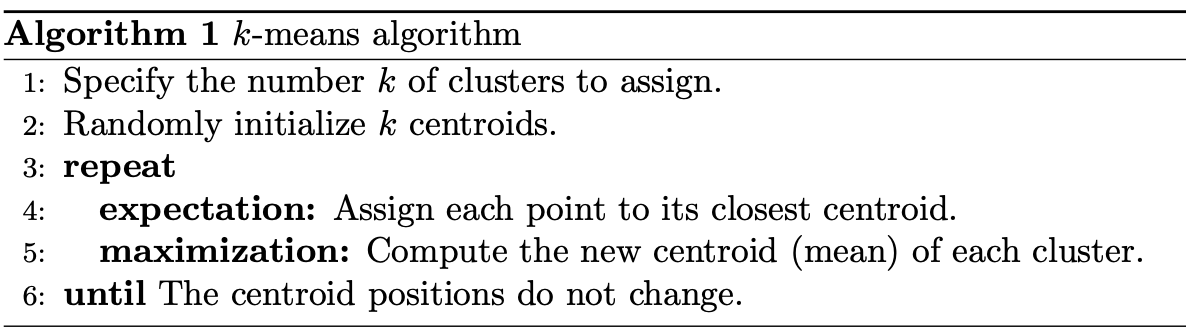

Thankfully, there’s a robust implementation of k-means clustering in Python from the popular machine learning package scikit-learn. You’ll learn how to write a practical implementation of the k-means algorithm using the scikit-learn version of the algorithm.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

## K-means on a syntethic data

### Generate Data

First, let's generate a two-dimensional dataset containing three distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

You can generate the synthetic data for testing sklearn Kmeans implementation using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:

* n_samples is the total number of samples to generate.
* centers is the number of centers to generate.
* cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:

* A two-dimensional NumPy array with the x- and y-values for each of the samples
* A one-dimensional NumPy array containing the cluster labels for each sample


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=200, centers=3,
                  cluster_std=1.2, random_state=42)

 Check some sample data

Here’s a look at the first five elements for each of the variables returned by make_blobs():

In [ ]:
X[:5]

array([[ 6.87880825,  2.54176919],
       [-5.65289175, 10.00056913],
       [-6.89432332, -7.95681484],
       [-8.6173284 , -8.56906612],
       [-7.5868649 , -5.86058708]])

In [ ]:
y[:5]

array([1, 0, 2, 2, 2])

**Data Preprocessing**

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

Scale the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Visualize the data**

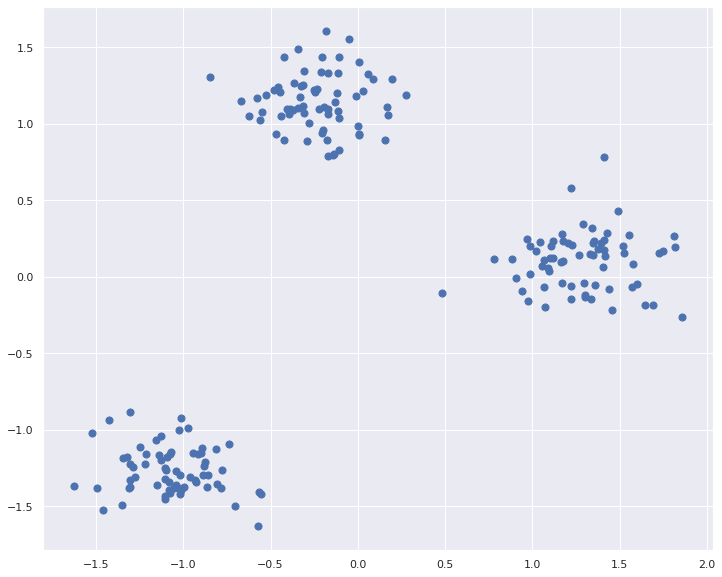

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50);

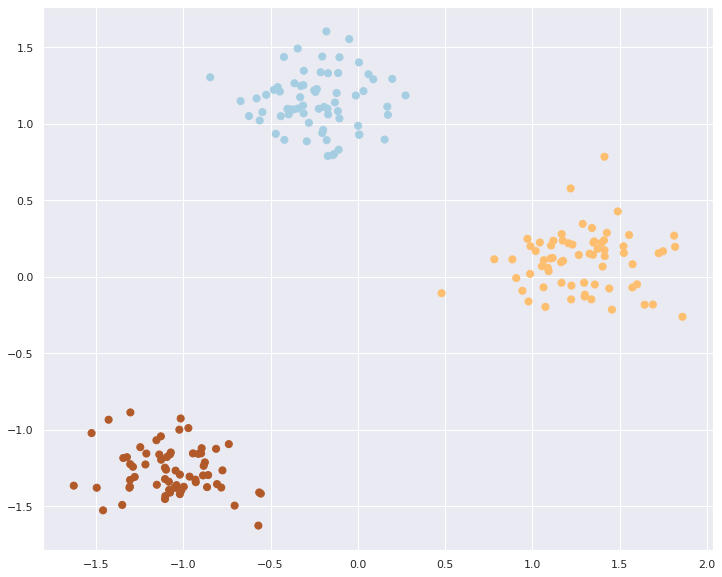

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c=y, cmap='Paired');

### Fit K-means

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are the parameters used in this example:

* `init` controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

* `n_clusters` sets k for the clustering step. This is the most important parameter for k-means.

* `n_init` sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

* `max_iter` sets the number of maximum iterations for each initialization of the k-means algorithm.

Instantiate the KMeans class with the following arguments:

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

The parameter names match the language that was used to describe the k-means algorithm earlier in the tutorial. Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:


In [ ]:
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=3, random_state=42)

### Clustering Quality

The quality of the cluster assignments is determined by computing the sum of the **squared error (SSE)** after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [ ]:
# The lowest SSE value
kmeans.inertia_

17.328282688380565

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.23219419,  1.14306478],
       [-1.06602859, -1.2650988 ],
       [ 1.2823119 ,  0.10315195]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

2

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:



In [ ]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

Recall actual labels

In [ ]:
y[:5]

array([1, 0, 2, 2, 2])

Note that the order of the cluster labels for the first two data objects was flipped. The order was [1, 0] in true_labels but [2, 0] in kmeans.labels_ even though those data objects are still members of their original clusters in kmeans.lables_.

This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics.



Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

Get cluster assignments labels
can also used .label_ for training set

In [ ]:
y_kmeans = kmeans.predict(X_scaled)

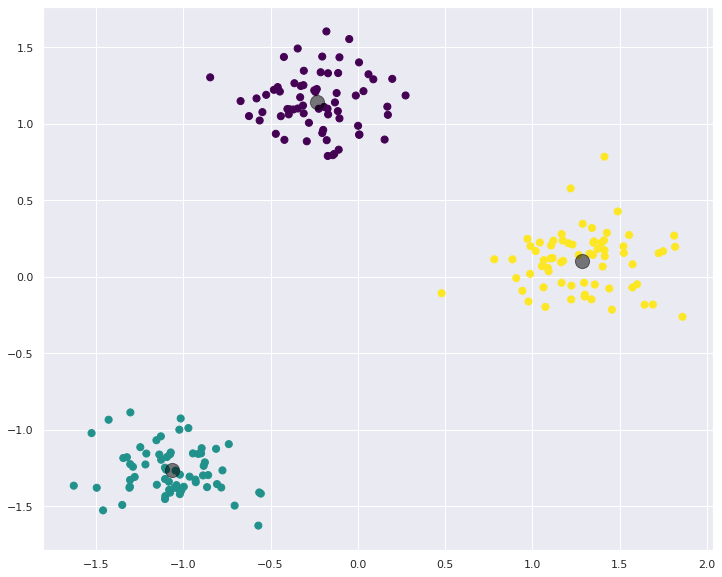

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Since we knew there 3 clusters in our dataset, we used n_clusters=3 when fitting our k means model. Since in many applications, we might not know the number of cluster beforehand, we should try different values for n_clusters and check cluster quality to choose the correct value for the number of clusters

Let's try n_clusters=2 and check the results

In [ ]:
num_of_clusters = 1

#intialize kmeans
kmeans = KMeans(
    init="random",
    n_clusters=num_of_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

#fit kmeans
kmeans.fit(X_scaled)

##cluster quality measure
# The lowest SSE value
kmeans.inertia_

399.99999999999966

Visualize the clustering

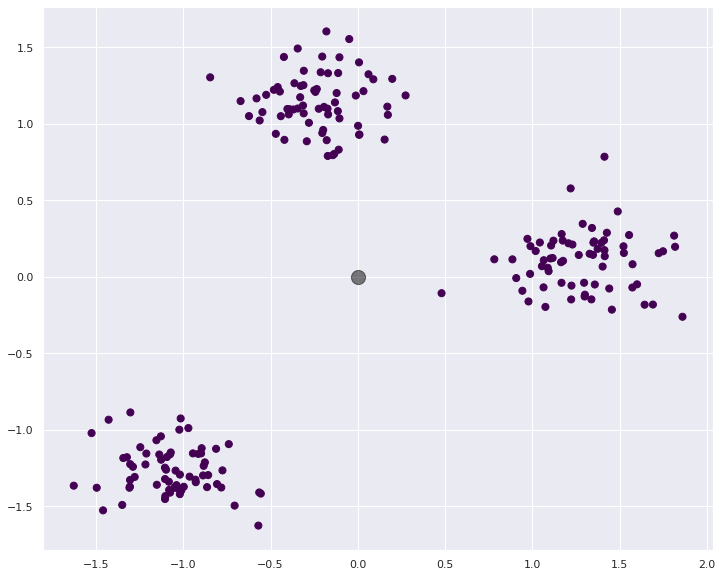

In [ ]:
y_kmeans = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Choosing the number of clusters

**Elbow method**

To perform the elbow method, run several k-means, increment k (number of clusters) with each iteration, and record the cluster quality (say **SSE**)

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

The previous code block made use of Python’s dictionary unpacking operator (**). To learn more about this powerful Python operator, check out How to Iterate Through a Dictionary in Python.

https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

**Display the elbow plot**

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

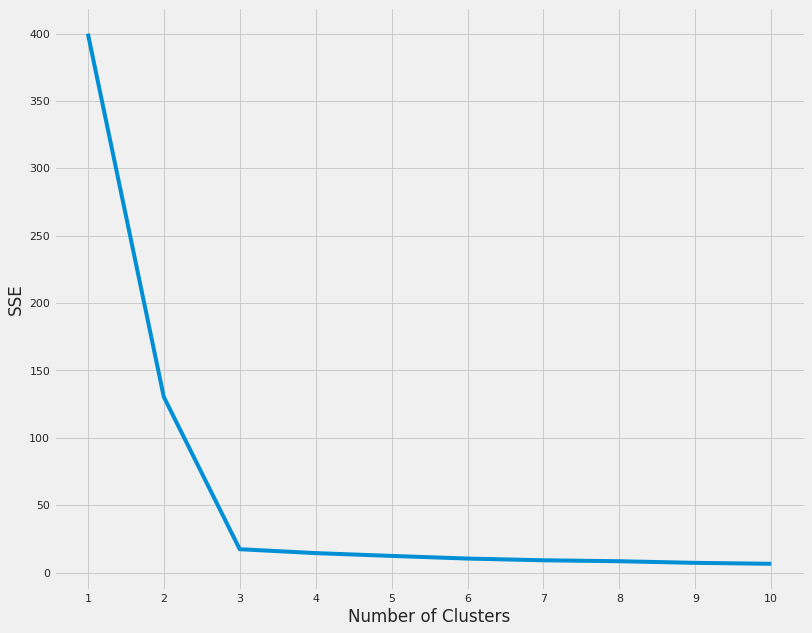

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

https://github.com/arvkevi/kneed

Install kneed

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import knee locator from kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [ ]:
kl.elbow

3

**Another clustering quality metric: silhouette coefficient**

The **silhouette coefficient** is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

* How close the data point is to other points in the cluster
* How far away the data point is from points in other clusters


Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:


In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

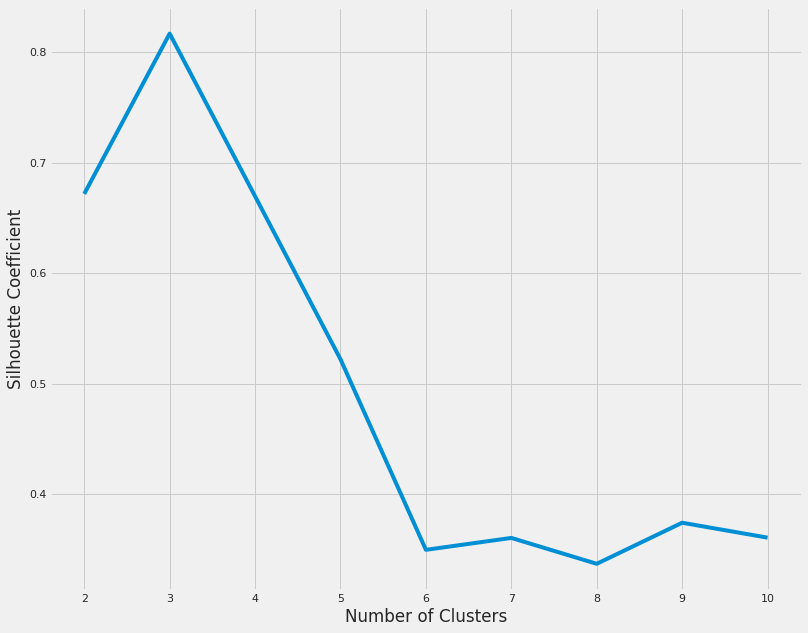

In [ ]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Advanced Clustering Evaluation



Using ground truth labels for evaluation

**Note:** In practice, it’s rare to encounter datasets that have ground truth labels.



The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow method and silhouette coefficient rarely match human intuition. This scenario highlights why advanced clustering evaluation techniques are necessary. To visualize an example, import these additional modules:

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

K means which is centroid based algorithm does not perform well with **non-spherical clusters**

Density-based clustering approaches such as DBSCAN are better suited for such data. Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.



Learn about DBSCAN here:

https://en.wikipedia.org/wiki/DBSCAN

https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow method and silhouette coefficient rarely match human intuition. This scenario highlights why advanced clustering evaluation techniques are necessary. To visualize an example, import these additional modules:



This time, use `make_moons()` to generate synthetic data in the shape of crescents:



In [ ]:
X, y = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
X_scaled = scaler.fit_transform(X)

**Visualize the crescent data**

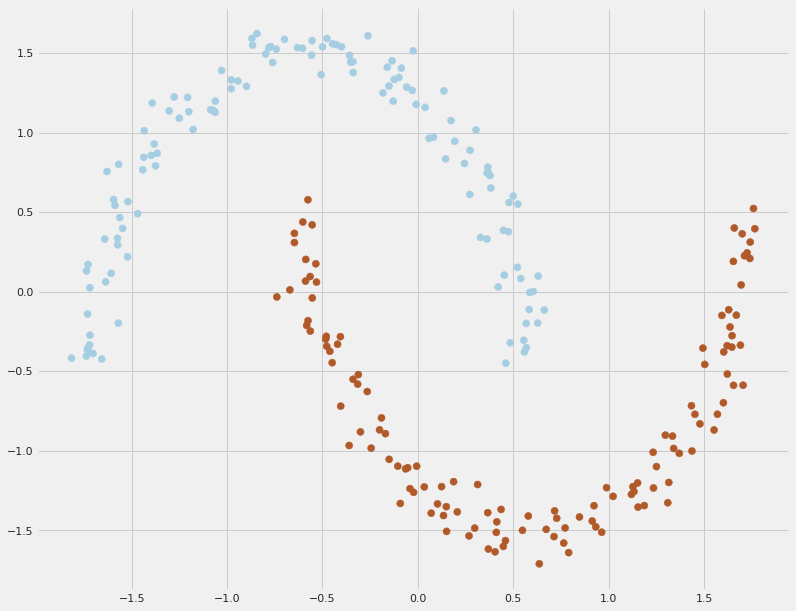

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c=y, cmap='Paired');

**Fit KMeans and DBSCAN**

Fit both a k-means and a DBSCAN algorithm to the new data and visually assess the performance by plotting the cluster assignments with Matplotlib:

In [ ]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(X_scaled)
dbscan.fit(X_scaled)



DBSCAN(eps=0.3)

In [ ]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)


dbscan_silhouette = silhouette_score(X_scaled, dbscan.labels_)

In [ ]:
kmeans_silhouette


0.49664368674348447

In [ ]:
dbscan_silhouette


0.37966840090456744

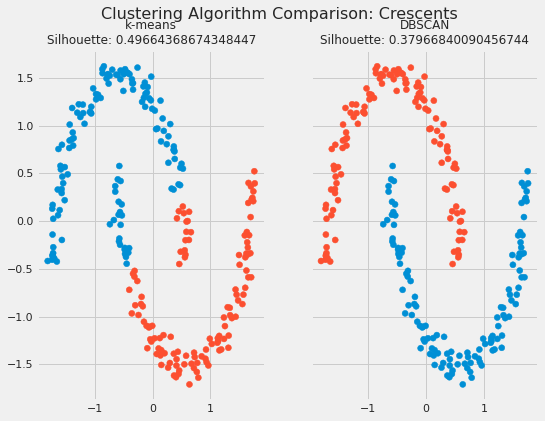

In [ ]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
scaled_features = X_scaled
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

This suggests that you need a better method to compare the performance of these two clustering algorithms.

Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the scikit-learn implementation of a common metric called the **adjusted rand index (ARI)**. Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


Given the knowledge of the ground truth class assignments y and our clustering algorithm assignments of the same samples y_pred, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations. One can also view the Rand index as a measure of the percentage of correct decisions made by the algorithm. I

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:

In [ ]:
ari_kmeans = adjusted_rand_score(y, kmeans.labels_)
ari_dbscan = adjusted_rand_score(y, dbscan.labels_)

In [ ]:
ari_kmeans

0.4712270735157155

In [ ]:
ari_dbscan

1.0

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.


There are several metrics that evaluate the quality of clustering algorithms.

Link: https://scikit-learn.org/stable/modules/classes.html#clustering-metrics

https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

## KMeans demo on real-world data

We will be using the gene expression cancer RNA-Seq Data Set from UCI Machine Learning Repositry for this demo.

https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

This collection of data is part of the RNA-Seq (HiSeq) PANCAN TCGA data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.

Full list of tumor abbreviations: https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations


Imports

In [ ]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Download and extract the TCGA dataset from UCI:

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

After the download and extraction is completed, you should have a directory named `TCGA-PANCAN-HiSeq-801x20531`

The KMeans class in scikit-learn requires a NumPy array as an argument. The NumPy package has a helper function to load the data from the text file into memory as NumPy arrays:

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype=str
)

In [ ]:
data.shape

(801, 20531)

Check out the first three columns of data for the first five samples as well as the labels for the first five samples:



In [ ]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The data variable contains all the gene expression values from 20,531 genes. The true_label_names are the cancer types for each of the 881 samples. The first record in data corresponds with the first label in true_labels.

The labels are strings containing abbreviations of cancer types:

* BRCA: Breast invasive carcinoma
* COAD: Colon adenocarcinoma
* KIRC: Kidney renal clear cell carcinoma
* LUAD: Lung adenocarcinoma
* PRAD: Prostate adenocarcinoma


To use these labels in the evaluation methods, you first need to convert the abbreviations to integers with LabelEncoder:

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)


In [ ]:
true_labels[:5]


array([4, 3, 4, 4, 0])

In [ ]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

Define number of clusters as unique cancer types

In [ ]:
n_clusters = len(label_encoder.classes_)

In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling, earlier in this tutorial. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.

**Dimensionality reduction** techniques help to address a problem with machine learning algorithms known as the curse of dimensionality. In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space. Since the gene expression dataset has over 20,000 features, it qualifies as a great candidate for dimensionality reduction.

**Principal Component Analysis (PCA)** is one of many dimensionality reduction techniques. PCA transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

A full description of PCA is out of scope for this demo, but you can learn more about it here:

https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

**Create sklearn pipeline**

Create pipeline to first reduce the number of features and then apply kmeans

The first pipeline will implement an alternative to the StandardScaler class called MinMaxScaler for feature scaling. You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution.

The next step in your preprocessing pipeline will implement the PCA class to perform dimensionality reduction:

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:

In [ ]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)


**Note the init parameter**
check sklearn Kmeans page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

What will  `k-means++ ` do?

The Pipeline class can be chained to form a larger pipeline. Build an end-to-end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelines to Pipeline:



In [ ]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

Calling .fit() with data as the argument performs all the pipeline steps on the data:

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Compute silhouette coefficient.

First we need to extract the preprocessed data. How?

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)

Check preprocessed data

In [ ]:
preprocessed_data[:5]

array([[ -5.66814062,  -8.87213883],
       [ -1.47020396,  10.28018174],
       [-10.84538683,  -1.34535227],
       [ -9.16796109,  -8.67012314],
       [ -6.27184805,  -3.10120752]])

Get cluster assignments

In [ ]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

Compute silhouette coefficient.

In [ ]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450308

Calculate ARI, too, since the ground truth cluster labels are available:


In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

As mentioned earlier, the scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

Since you specified n_components=2 in the PCA step of the k-means clustering pipeline, you can also visualize the data in the context of the true labels and predicted labels. We will pllot the results using a pandas DataFrame and the seaborn plotting library:

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [ ]:
pcadf.head()

,component_1,component_2,predicted_cluster,true_label
0,-5.668141,-8.872139,3,PRAD
1,-1.470204,10.280182,2,LUAD
2,-10.845387,-1.345352,0,PRAD
3,-9.167961,-8.670123,3,PRAD
4,-6.271848,-3.101208,0,BRCA


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


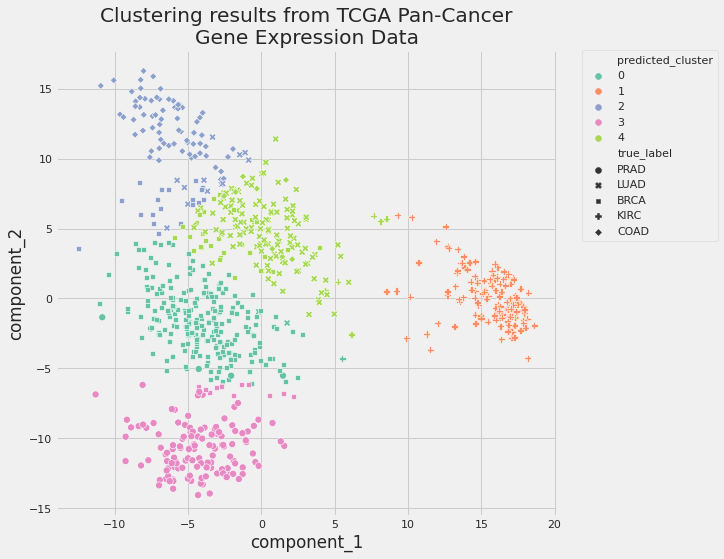

In [ ]:
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Your first k-means clustering pipeline performed well, but there’s still room to improve. That’s why you went through the trouble of building the pipeline: you can tune the parameters to get the most desirable clustering results.

The process of parameter tuning consists of sequentially altering one of the input values of the algorithm’s parameters and recording the results. At the end of the parameter tuning process, you’ll have a set of performance scores, one for each new value of a given parameter. Parameter tuning is a powerful method to maximize performance from your clustering pipeline.

By setting the PCA parameter n_components=2, you squished all the features into two components, or dimensions. This value was convenient for visualization on a two-dimensional plot. But using only two components means that the PCA step won’t capture all of the explained variance of the input data.

Explained variance measures the discrepancy between the PCA-transformed data and the actual input data. The relationship between n_components and explained variance can be visualized in a plot to show you how many components you need in your PCA to capture a certain percentage of the variance in the input data. You can also use clustering performance metrics to evaluate how many components are necessary to achieve satisfactory clustering results.

In this example, you’ll use clustering performance metrics to identify the appropriate number of components in the PCA step. The Pipeline class is powerful in this situation. It allows you to perform basic parameter tuning using a for loop.

Iterate over a range of n_components and record evaluation metrics for each iteration:

In [ ]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

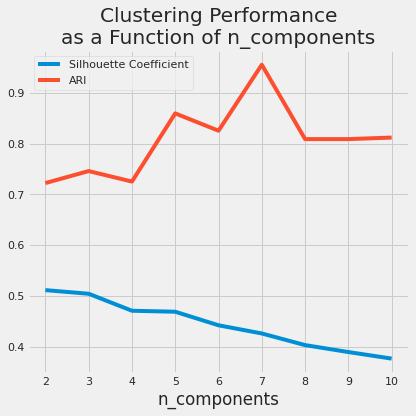

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance\nas a Function of n_components")
plt.tight_layout()
plt.show()

Based on the ARI score 7 is the optimal of components to reduce to.

# **Credits**

**The END** <br>
**Authors: Dr. Samir Gupta, Dr. Matthew McCoy & ICBI AIM-AHEAD Team**

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/HIDSLOGO.AA1.jpg" alt="Powered by" width="500"/>